In [1]:
from Dataset import get_dataset, preprocessing, tokenizer, create_label

import matplotlib.pyplot as plt

In [2]:
reviews_df, wines_df, users_df = get_dataset()

In [3]:
reviews_df.info(), wines_df.info(), users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366292 entries, 0 to 366291
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Wine         366292 non-null  object 
 1   Year         366292 non-null  object 
 2   Wine ID      366292 non-null  int64  
 3   User Rating  366292 non-null  float64
 4   Note         366292 non-null  object 
 5   CreatedAt    366292 non-null  object 
 6   User         366292 non-null  object 
 7   Label        366292 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 22.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Winery      1200 non-null   object 
 1   Year        1200 non-null   object 
 2   Wine ID     1200 non-null   int64  
 3   Wine        1200 non-null   object 
 4   Rating      1200 non-null   float64
 5  

(None, None, None)

Data Visualization

<AxesSubplot: >

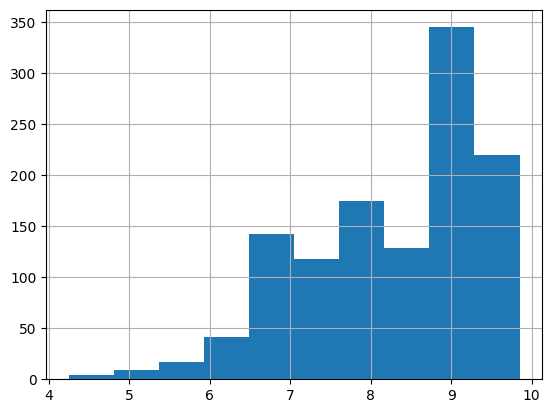

In [4]:
wines_df['Price'].hist()

<AxesSubplot: ylabel='Wine'>

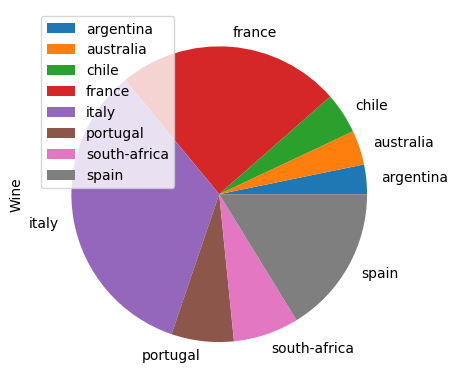

In [5]:
wines_df.groupby(['Country']).count()[wines_df.groupby(['Country']).count()['Wine']>20].plot(kind='pie', y='Wine')


<AxesSubplot: ylabel='Wine'>

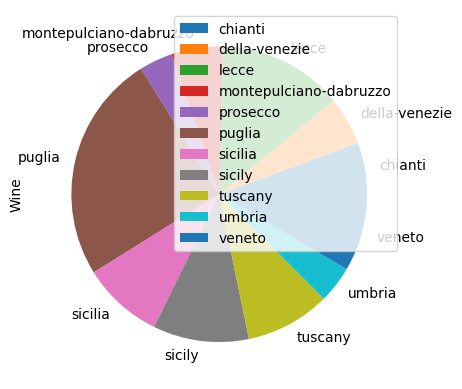

In [6]:
geo_area_it = wines_df[wines_df['Country']=='italy'].groupby(['Region']).count()

geo_area_it[geo_area_it['Wine']>8].plot(kind='pie', y='Wine')

<AxesSubplot: ylabel='User'>

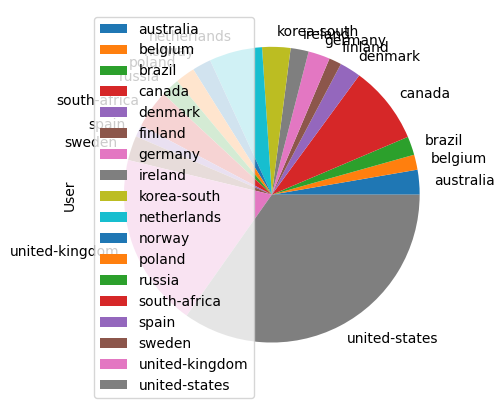

In [7]:
users_df.groupby(['Country']).count()[users_df.groupby(['Country']).count()['User']>500].plot(kind='pie', y='User')



Data Processing - Cleaning

In [12]:
reviews_df['Note-PreProcessed']=reviews_df['Note'].apply(lambda f: preprocessing(f))
reviews_df['Note-Tokenized']=reviews_df['Note'].apply(lambda f: tokenizer(f))
reviews_df['Label']=reviews_df['User Rating'].apply(lambda f: create_label(f))
reviews_df

,Wine,Year,Wine ID,User Rating,Note,CreatedAt,User,Label,Note-PreProcessed,Note-Tokenized
0,Atalaya Manzanilla N.V.,N.V.,1979160,3.5,Very acceptable Manzanilla fina from Aldi. Com...,2019-05-07T13:13:21.000Z,m3860719474ec25c0d312a72a6c8c77b,0,very acceptable manzanilla fina from aldi comp...,"[Very, acceptable, Manzanilla, fina, Aldi, Com..."
1,Atalaya Manzanilla N.V.,N.V.,1979160,3.0,One of the best value wines around. Under €2.5...,2020-11-02T13:20:21.000Z,adam.thompso,0,one of the best value wines around under €250 ...,"[One, best, value, wines, around, Under, 2, 50..."
2,Atalaya Manzanilla N.V.,N.V.,1979160,3.0,"Serve cold with hard cheese and nuts, preferab...",2018-09-06T18:26:39.000Z,martin.coxo,0,serve cold with hard cheese and nuts preferabl...,"[Serve, cold, hard, cheese, nuts, preferably, ..."
3,Atalaya Manzanilla N.V.,N.V.,1979160,3.0,"Do manzanilla, type fino",2014-05-21T18:08:48.000Z,anneliesa,0,do manzanilla type fino,"[Do, manzanilla, type, fino]"
4,Atalaya Manzanilla N.V.,N.V.,1979160,4.0,"Fresh, hint of saltiness, definitely a great a...",2018-09-26T20:29:23.000Z,vivien.ware,1,fresh hint of saltiness definitely a great ape...,"[Fresh, hint, saltiness, definitely, great, ap..."
...,...,...,...,...,...,...,...,...,...,...
366287,Orvieto Classico Secco 2018,2018,1361611,3.5,Crisp and dry. Good value.,2018-07-11T00:41:07.000Z,naomi.d-ottavio,0,crisp and dry good value,"[Crisp, dry, Good, value, ]"
366288,Orvieto Classico Secco 2018,2018,1361611,5.0,Nice mineral and fruit. Great with food. Paire...,2016-04-03T00:22:13.000Z,eric_lamm,1,nice mineral and fruit great with food paired ...,"[Nice, mineral, fruit, Great, food, Paired, ch..."
366289,Orvieto Classico Secco 2018,2018,1361611,3.5,On the same line as. Pinot Blanc. Clean. Dry. ...,2015-01-16T20:00:29.000Z,kens11,0,on the same line as pinot blanc clean dry nice,"[On, line, Pinot, Blanc, Clean, Dry, Nice, ]"
366290,Orvieto Classico Secco 2018,2018,1361611,2.0,"Sour, watery flavor",2016-05-03T01:42:33.000Z,jessica_rag,-1,sour watery flavor,"[Sour, watery, flavor]"
